In [188]:
import pandas as pd
from functions import data_treatment, request, product_pricing, df_to_all_df, format_all_df
import seaborn as sns
import matplotlib.pyplot as plt

In [352]:
product_database = {}
weeks = 3
all_df = pd.DataFrame([])
all_jsons = []

for week in range(weeks):
    json = data_treatment(request())
    json, product_database = product_pricing(json, product_database)
    all_jsons.append(json)

In [404]:
def df_to_analysis(all_jsons:list, column_name:str):
    new_json = {}
    n = 0
    for week in range(len(all_jsons)):
        for transaction in range(len(all_jsons[week])):
            new_json[n] = {}
            new_json[n]['date'] = f'Week {week+1}'
            new_json[n]['id'] = all_jsons[week][transaction]['id']
            for i in range(0,21):
                new_json[n][f'prod_{i}'] = 0
            for key in all_jsons[week][transaction]:
                if ('prod' in key):
                    new_json[n][key] = float(all_jsons[week][transaction][key][column_name][0])
            n += 1

    df = pd.DataFrame(new_json).T
    return df

#### Dataframe - Quantidades de produtos vendidos

In [407]:
all_sales = df_to_analysis(all_jsons=all_jsons, column_name='qnt')
all_sales.head(5)

,date,id,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,...,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,prod_20
0,Week 1,lag5jfhstwb3ihdryf,41.0,3.0,0,11.0,15.0,0,0,9.0,...,0,0,0,0,1015.257533,0,0,0,0,0
1,Week 1,lag5jfhsjknx459t7g,5.0,0,38.0,27.0,0,4.0,8.0,7.0,...,0.0,0,0,0,781.808114,0,0,0,0,0
2,Week 1,lag5jfhsifcq2v71ub,0,0,25.0,24.0,45.0,4.0,46.0,19.0,...,108.442139,0,0,0,754.210624,0,0,0,0,0
3,Week 1,lag5jfhse72yjk53il,0,44.0,46.0,0,42.0,20.0,40.0,0,...,0,0,0,0,861.596429,0,0,0,0,0
4,Week 1,lag5jfhszp0yfugegs,36.0,6.0,48.0,0,16.0,46.0,25.0,0,...,0,0,0,0,814.657229,0,0,0,0,0


#### Quantidade de produtos vendidos por semana

In [410]:
weekly_sales = all_sales.groupby('date').agg({f'prod_{i}':'sum' for i in range(20)})
weekly_sales.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19
date,,,,,,,,,,,,,,,,,,,,
Week 1,90.0,221.0,330.0,265.0,208.0,374.0,319.0,209.0,1810.0,557.851114,1987.567394,1650.474726,0,0,0,14478.929596,0,0,0,0
Week 2,134.0,253.0,298.0,174.0,265.0,202.0,185.0,305.0,3250.0,3566.494893,5061.157928,3134.371663,0,0,0,13719.724580,0,0,0,0
Week 3,74.0,0.0,0.0,17.0,0.0,16.0,22.0,56.0,45.0,3.428190,0.000000,431.776679,0,0,0,1581.436510,0,0,0,0


In [424]:
weekly_sales_to_boxplot = weekly_sales.T
weekly_sales_to_boxplot=weekly_sales_to_boxplot.agg({f'Week {i+1}':'sum' for i in range(weeks)}).to_frame().rename(columns={0:'SELLS'})
weekly_sales_to_boxplot

,SELLS
Week 1,22500.822830
Week 2,30547.749063
Week 3,2246.641379


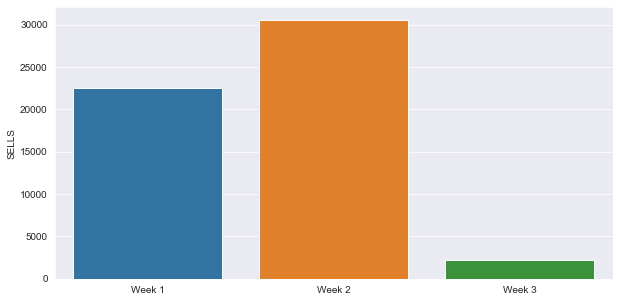

In [426]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=weekly_sales_to_boxplot.index, y=weekly_sales_to_boxplot['SELLS'])
sns.set_style('darkgrid')

#### Monthly Revenues

In [119]:
month_df=all_df.groupby('date').agg({'price':'sum'})
month_df=month_df.reset_index()

In [120]:
month_df['date']=pd.to_datetime(month_df['date']).dt.month_name()
month_df.head()

,date,price
0,October,2853.883112
1,October,8094.631978
2,October,9744.620038
3,September,1481.742782
4,August,328.750000


In [122]:
month_df=month_df.groupby('date').agg({'price':'sum'}).reset_index()
month_df.head()

,date,price
0,August,328.750000
1,October,25152.905347
2,September,4799.204406
